https://www.youtube.com/watch?v=woKYyhLCcnU

### DB setup

In [1]:
import pandas as pd
import sqlite3
import sqlalchemy as db
from sqlalchemy.orm import Session
import matplotlib as plt
from collections import Counter
import operator
import matplotlib.pyplot as plt

In [2]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)     #relative directory (in same folder as this notebook so no directory)
connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)
cols = flights.columns

2019-11-25 23:12:05,375 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-25 23:12:05,375 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:12:05,378 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-25 23:12:05,379 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:12:05,381 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("ontime")
2019-11-25 23:12:05,393 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:12:05,400 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ontime' AND type = 'table'
2019-11-25 23:12:05,405 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:12:05,418 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("ontime")
2019-11-25 23:12:05,420 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:12:05,422 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SEL

In [3]:
cols.keys()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

### Best and Worst Airlines

In [4]:
def percentages(timeDelay):
    numerator = Counter(session.query(cols.UniqueCarrier).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay).all())
    denominator = Counter(session.query(cols.UniqueCarrier).all())
    percentDict = {}
    for airline in denominator.keys():
        percentDict[str(airline)] = (numerator[airline]/denominator[airline])*100
    return dict(sorted(percentDict.items(), key=operator.itemgetter(1), reverse=True))

In [5]:
onehour = percentages(60)

2019-11-25 23:12:05,547 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-11-25 23:12:05,548 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ?
2019-11-25 23:12:05,555 INFO sqlalchemy.engine.base.Engine (60,)
2019-11-25 23:12:40,955 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime
2019-11-25 23:12:40,955 INFO sqlalchemy.engine.base.Engine ()


In [6]:
threehours = percentages(180)

2019-11-25 23:24:44,226 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ?
2019-11-25 23:24:44,227 INFO sqlalchemy.engine.base.Engine (180,)
2019-11-25 23:25:15,080 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime
2019-11-25 23:25:15,081 INFO sqlalchemy.engine.base.Engine ()


In [7]:
fivehours = percentages(300)

2019-11-25 23:42:26,628 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ?
2019-11-25 23:42:26,631 INFO sqlalchemy.engine.base.Engine (300,)
2019-11-25 23:42:44,815 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime
2019-11-25 23:42:44,815 INFO sqlalchemy.engine.base.Engine ()


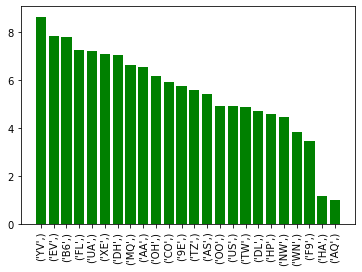

In [8]:
plt.bar(onehour.keys(), onehour.values(), width=0.8, color='g')
plt.xticks(range(len(onehour)), onehour.keys(), rotation=90)
plt.show()

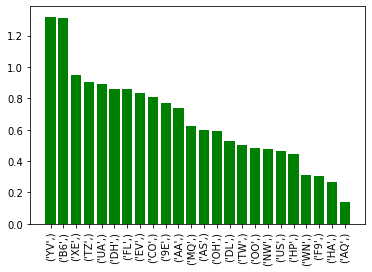

In [9]:
plt.bar(threehours.keys(), threehours.values(), width=0.8, color='g')
plt.xticks(range(len(threehours)), threehours.keys(), rotation=90)
plt.show()

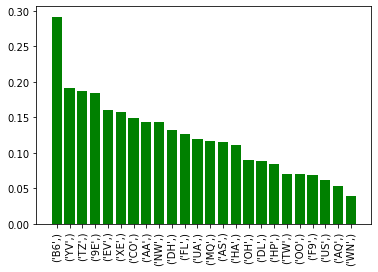

In [10]:
plt.bar(fivehours.keys(), fivehours.values(), width=0.8, color='g')
plt.xticks(range(len(fivehours)), fivehours.keys(), rotation=90)
plt.show()